- https://everyday-image-processing.tistory.com/87

- https://engineer-mole.tistory.com/234#google_vignette

# concatenate
```python
import numpy as np
np.concatenate((a1, a2, ...), axis=0)
```
- Parameters

1. (a1, a2, ...) : a1, a2, ... 들은 각각 넘파이 객체입니다. 이들을 합치기 위해서는 각 객체의 합칠 axis의 shape을 제외하고 나머지 shape이 전부 동일해야합니다.

2. axis=0 : 합치는 방향입니다. ndim-1까지 정할 수 있습니다.

- axis=0 : 다음 행에 이어서 붙인다!

> 각 행이 axis=0, 각 열이 axis=1

> **합치는 기준이 되는 축을 제외하고 나머지 차원의 크기는 모두 같아야 한다.**

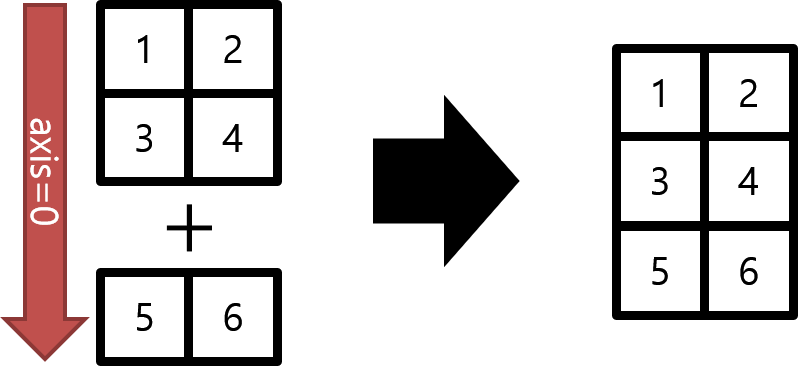


In [ ]:
import numpy as np
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
# error code
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

np.concatenate((a, b), axis=1)

ValueError: ignored

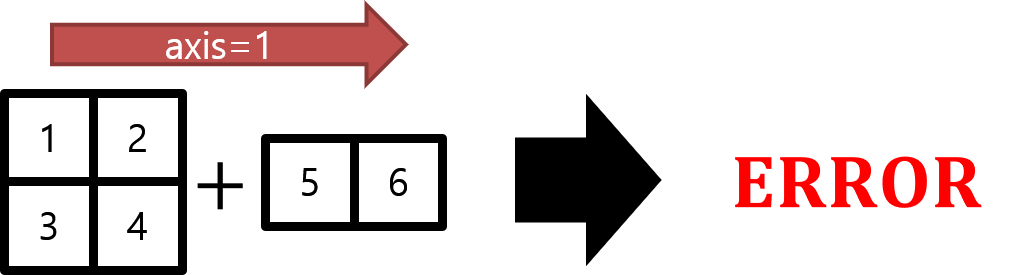

solution
- .T / transpose는 선형대수에서 중요한 연산으로 간단하게 말하면 가상의 주대각성분을 기준으로 뒤집는다

In [ ]:
a = np.array([[1, 2], [3, 4]]) # a.shape = (2, 2)
b = np.array([[5, 6]]) # b.shape = (1, 2)

np.concatenate((a, b.T), axis=1)
# 행과 열을 뒤집어줌

array([[1, 2, 5],
       [3, 4, 6]])

- 간단하게 넘파이 객체에 .T를 하면 shape이 (2, 1)로 변하게 된다.

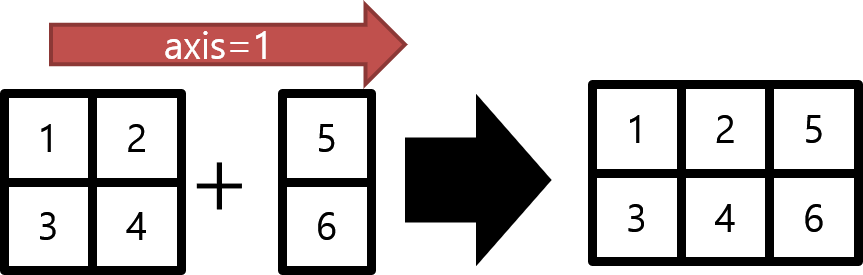

In [ ]:
# 3차원
a = np.arange(1, 28).reshape(3, 3, 3)
b = np.arange(29, 38).reshape(3, 3, 1)

np.concatenate((a, b), axis=2)

array([[[ 1,  2,  3, 29],
        [ 4,  5,  6, 30],
        [ 7,  8,  9, 31]],

       [[10, 11, 12, 32],
        [13, 14, 15, 33],
        [16, 17, 18, 34]],

       [[19, 20, 21, 35],
        [22, 23, 24, 36],
        [25, 26, 27, 37]]])

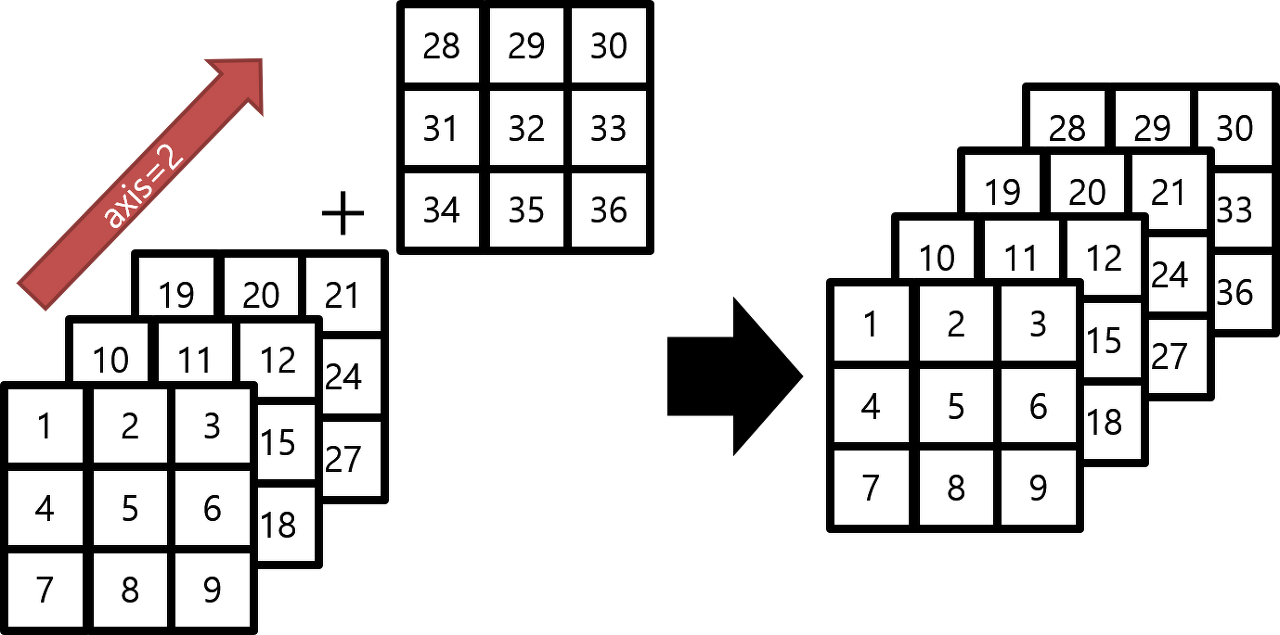

In [ ]:
a = np.arange(1, 7).reshape(3, 2)
b = np.arange(7, 10).reshape(1, 3)
c = np.arange(10, 19).reshape(3, 3)

# 1.  a 배열에 transpose를 취하여 axis=0 방향으로 합치기
print(np.concatenate((a.T, b, c), axis=0))

[[ 1  3  5]
 [ 2  4  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]
 [16 17 18]]


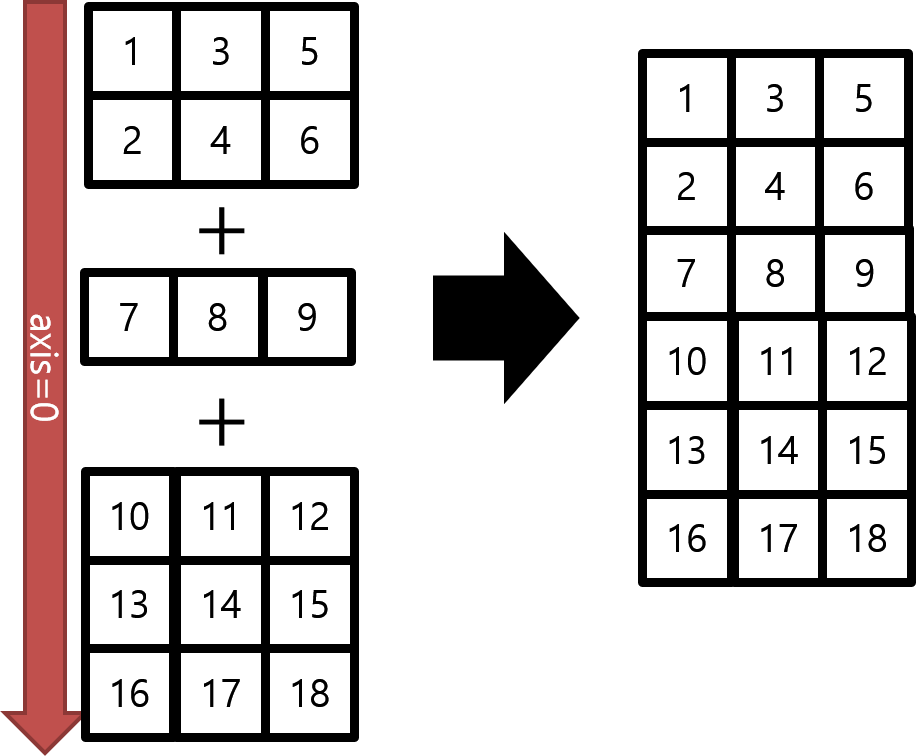

In [ ]:
# 2.  b 배열에 transpose를 취하여 axis=1 방향으로 합치기
np.concatenate((a, b.T, c), axis=1)

array([[ 1,  2,  7, 10, 11, 12],
       [ 3,  4,  8, 13, 14, 15],
       [ 5,  6,  9, 16, 17, 18]])

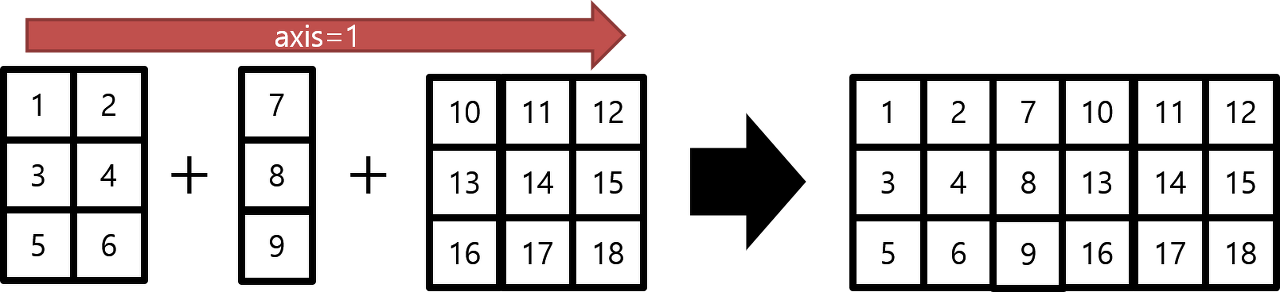

### **전치 행렬 Transpose**
- 행렬 A가 주어졌을 때, 그 행렬의 행과 열을 바꾸어 얻어낸 행렬

- T메소드는 배열의 shape을 역방향으로 바꿔준다.
- transpose 메소드는 원하는 방향으로 바꿀 수가 있다.

> .T 메서드와 transpose 메서드의 차이

- .T 사용 시,
- shape이 (2,3,4) 였던 data => (4, 3, 2)

> - axis0=2
- axis1=3
- axis2=4

- A를 axis (1,2,0)으로 transpose 시,
- 단순히 차원의 순서만을 뒤집는 것이 아닌, 원하는 대로 뒤집을 수 있다.

In [ ]:
A = np.arange(6).reshape(2,3)
A

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
A.T

array([[0, 3],
       [1, 4],
       [2, 5]])

In [ ]:
A.transpose()
# 아무 설정을 해주지 않으면 .T와 같은 결과

array([[0, 3],
       [1, 4],
       [2, 5]])

In [ ]:
np.transpose(A)

array([[0, 3],
       [1, 4],
       [2, 5]])

In [ ]:
A = np.arange(24).reshape(2,3,4)
A

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
A.transpose((2,1,0))

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

np.swapaxes(행렬, 축1, 축2)

In [ ]:
b.shape
>>> (2, 3, 4)
np.swapaxes(b, 1, 0)
>>> (3,2,4)

### **Stack**
- 기존의 축(차원)에 따라 결합하는 것이 numpy.concatenate()로, 새로운 축에 따라 결합하는 것이 numpy.stack()이다.

In [5]:
a1 = np.ones(3, int)
print(a1)
print(a1.shape)

a2 = np.full(3, 2)
print(a2)
print(a2.shape)

[1 1 1]
(3,)
[2 2 2]
(3,)


In [6]:
print(np.stack([a1, a2], 0))

[[1 1 1]
 [2 2 2]]


In [7]:
print(np.stack([a1, a2], 1))

[[1 2]
 [1 2]
 [1 2]]


- 결과의 배열에 존재하지 않는 축을 지정하면 에러가 된다.

#### 2차원 배열에서의 stack
print(np.stack([a1, a2], 0)) => 마지막 인자로 넣어주는 차원이 추가되는 차원


In [8]:
a1 = np.ones((3, 4), int)
a2 = np.full((3, 4), 2)
print(np.stack([a1, a2], 0))
print(np.stack([a1, a2], 0).shape)

[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[2 2 2 2]
  [2 2 2 2]
  [2 2 2 2]]]
(2, 3, 4)


In [9]:
print(np.stack([a1, a2], 1))
print(np.stack([a1, a2], 1).shape)

[[[1 1 1 1]
  [2 2 2 2]]

 [[1 1 1 1]
  [2 2 2 2]]

 [[1 1 1 1]
  [2 2 2 2]]]
(3, 2, 4)


In [10]:
print(np.stack([a1, a2], 2))
print(np.stack([a1, a2], 2).shape)

[[[1 2]
  [1 2]
  [1 2]
  [1 2]]

 [[1 2]
  [1 2]
  [1 2]
  [1 2]]

 [[1 2]
  [1 2]
  [1 2]
  [1 2]]]
(3, 4, 2)


### Block

In [15]:
#  2차원 리스트로 가로 방향의 배열을 지정하면 그대로 결합된다.
a1 = np.ones((2, 3), int)
a2 = np.full((2, 3), 2)
print(np.block([a1, a2]))
print(np.block([[a1, a2], [a2, a1]]))
a3 = np.full(6, 3)

[[1 1 1 2 2 2]
 [1 1 1 2 2 2]]
[[1 1 1 2 2 2]
 [1 1 1 2 2 2]
 [2 2 2 1 1 1]
 [2 2 2 1 1 1]]


In [16]:
#  인수를 3차원으로 하면 결과도 3차원이 된다.
print(np.block([[a1, a2], [a3]]))

[[1 1 1 2 2 2]
 [1 1 1 2 2 2]
 [3 3 3 3 3 3]]


- 첫 번째 코드(result1)에서는 a1과 a2가 수평으로 연결되고, 그 결과로 생성된 배열과 a3이 수직으로 연결됩니다. 따라서 결과적으로 두 개의 2D 배열이 수직으로 연결되고, 그 결과로 생성된 배열과 1D 배열 a3이 수직으로 연결됩니다.

- 두 번째 코드(result2)에서는 a1과 a2가 수평으로 연결되고, 그 결과로 생성된 배열과 1D 배열 a3이 같은 행에 연결됩니다.

In [17]:
# [] 로 차원을 정하지 않으면 에러가 발생하므로 주의하자.
print(np.block([[a1, a2], a3]))

ValueError: ignored

이외에도

1. vstack
2. hstack
3. dstack

이 있다.